In [1]:
import pathlib
import pandas as pdgorras centro de guadalajara
from matplotlib import pyplot as plt

In [4]:
CURRENT_PATH = pathlib.Path.cwd()
DATA_PATH = 'data/data1.csv'
FULL_DATA_PATH = CURRENT_PATH.joinpath(DATA_PATH) # WindowsPath('C:/Users/Jonathan/OneDrive/Documents/matplotlib/data/data1.csv')

def load_data(full_data_path=FULL_DATA_PATH):
    return pd.read_csv(full_data_path)

df = load_data()
df.head()

,Age,All_Devs,Python,JavaScript
0,18,17784,20046,16446
1,19,16500,17100,16791
2,20,18012,20000,18942
3,21,20628,24744,21780
4,22,25206,30500,25704


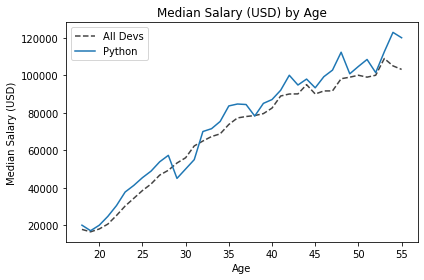

In [7]:
ages = df['Age']
dev_salaries = df['All_Devs']
py_salaries = df['Python']
js_salaries = df['JavaScript']

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')


plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.legend()
plt.tight_layout()
plt.show()

Let's see how we can add in some fills to our plot. Now we'll start off with a simple one here just to see what this look like.

So let's say that we wanted to fill the entire area underneath our Python plotted data. So to do this:

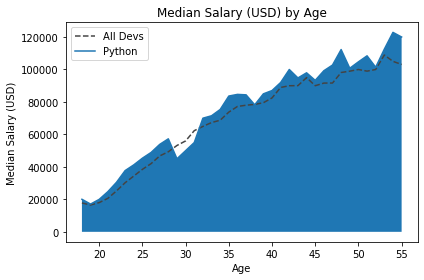

In [8]:
ages = df['Age']
dev_salaries = df['All_Devs']
py_salaries = df['Python']
js_salaries = df['JavaScript']

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

# Fill underneath our Python plotted data. We pass the x-axis. 
# Now we want to say what we want to fill between. So we want to fill between the py_salaries.
# Now we are not going to pass in anything else, now we can pass in an additional parameter here and say I wan to fill between py_salaries and dev_salaries for example, but the y2= 
# this is call the y2 [plt.fill_between(ages, py_salaries, y2=)] this is set to 0 by default. So if we don't put anything in there then it is just going to fill between our py_salaries
# all the way down to the bottom. 
plt.fill_between(ages, py_salaries)

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()
plt.show()

We can see that the fill is interfering here a bit with our other plot in line so to make this look a little bit better let's put an ```alpha``` on our fill so that we can see through this a bit better:

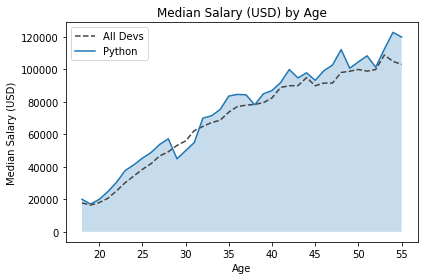

In [9]:
ages = df['Age']
dev_salaries = df['All_Devs']
py_salaries = df['Python']
js_salaries = df['JavaScript']

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

# Fill underneath our Python plotted data. We pass the x-axis. 
# Now we want to say what we want to fill between. So we want to fill between the py_salaries.
# Now we are not going to pass in anything else, now we can pass in an additional parameter here and say I wan to fill between py_salaries and dev_salaries for example, but the y2= 
# this is call the y2 [plt.fill_between(ages, py_salaries, y2=)] this is set to 0 by default. So if we don't put anything in there then it is just going to fill between our py_salaries
# all the way down to the bottom. 
plt.fill_between(ages, py_salaries, alpha=0.25) # alpha

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()
plt.show()

I fill like just filling in our line plots with an alpha here just makes our plots look a little bit better but if we use this with conditional tresholds then it can also gives us some useful information and some feedback as well.

So right now our fill is defaulting to zero which means it is feeling between our python plot (py_salaries) and zero all the way down at the bottom but we can change that, so I have the overall median salary for all developers who answered the survey. So, instead of using 0 let's say that we wanted to fill between this overall median and our python salaries, so to do that we can just pass that in as a third argument which is the y2 value and that will fill that in instead of defaulting to 0.

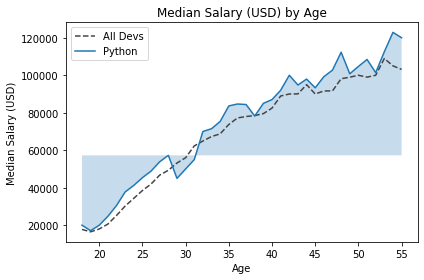

In [11]:
ages = df['Age']
dev_salaries = df['All_Devs']
py_salaries = df['Python']
js_salaries = df['JavaScript']

plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

overall_median = 57287

plt.fill_between(ages, py_salaries, overall_median, alpha=0.25) # alpha

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')

plt.tight_layout()
plt.show()

So now we can see that instead of plotting at zero that overall_median was 57287 so now it's showing us exactly where our py_salaries plot cross that overall_median salary so when our py_salaries plot is bellow the overall_median salary it fills up to that point and when our plot is above the overall_median salary it fills down to that point so that actually gives us some nice feedback and we can even put in some additional conditionals here so that it only fills when that condition is met:

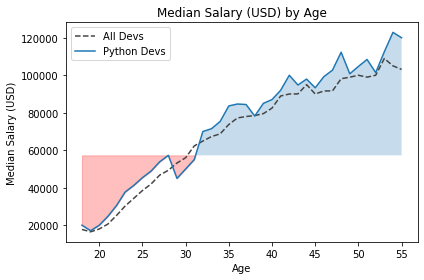

In [25]:
# Fill with green color when we are above this overall_median salary and another when it is bellow.
ages = df['Age']
dev_salaries = df['All_Devs']
py_salaries = df['Python']
js_salaries = df['JavaScript']


plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python Devs')

overall_median = 57287

plt.fill_between(ages, py_salaries, overall_median, 
                 where=(py_salaries > overall_median), interpolate=True, alpha=0.25)

# Interpolate = It is an optional parameter that accepts boolean values. It is only relevant if where is used and two curves are crossing each other. 
#               Semantically where if generally used for y1>y2 or similar cases. By default the filled regions will be placed at the x-array positions defining a filled polygonal area. 
#               The section of x that has the intersection are simply clipped. Setting this parameter to True results in calculation of the actual point of intersection and extends to 
#               the filled regions till the points.

plt.fill_between(ages, py_salaries, overall_median, 
                 where=(py_salaries <= overall_median), interpolate=True, color='red', alpha=0.25)

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.legend()

plt.tight_layout()
plt.show()

So right now, we have our plots filling in the area between our py_salaries plot and a fixed value and that fixed values is the overall_median. But we can actually fill in the area between 2 different plots as well, so for example if we wanted to fill in the area between py_salaries and dev_salaries by age then we can just pass that into the fill_between method instead.

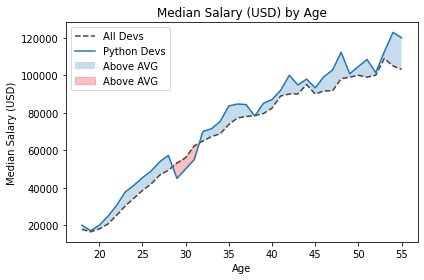

In [27]:
# Fill with green color when we are above this overall_median salary and another when it is bellow.
ages = df['Age']
dev_salaries = df['All_Devs']
py_salaries = df['Python']
js_salaries = df['JavaScript']


plt.plot(ages, dev_salaries, color='#444444', linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python Devs')

overall_median = 57287

plt.fill_between(ages, py_salaries, dev_salaries, 
                 where=(py_salaries > dev_salaries), interpolate=True, alpha=0.25, label='Above AVG')

# Interpolate = It is an optional parameter that accepts boolean values. It is only relevant if where is used and two curves are crossing each other. 
#               Semantically where if generally used for y1>y2 or similar cases. By default the filled regions will be placed at the x-array positions defining a filled polygonal area. 
#               The section of x that has the intersection are simply clipped. Setting this parameter to True results in calculation of the actual point of intersection and extends to 
#               the filled regions till the points.

plt.fill_between(ages, py_salaries, dev_salaries, 
                 where=(py_salaries <= dev_salaries), interpolate=True, color='red', alpha=0.25, label='Above AVG')

plt.title('Median Salary (USD) by Age')
plt.xlabel('Age')
plt.ylabel('Median Salary (USD)')
plt.legend()

plt.tight_layout()
plt.show()